# Train for Memorization and Generalization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Dataset

In [2]:
data = pd.read_csv("combined_features.csv")

In [3]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [4]:
X.shape

(903, 131072)

## Train for Memorization

In [9]:
clf = MLPClassifier(
                hidden_layer_sizes=(60,), 
                random_state=42,
                activation='relu')
clf.fit(X,y)
(clf.predict(X) == y).sum() / len(y)

1.0

## Train for Generalization

In [6]:
STARE_x = X.iloc[0:385]
ODIR_x = X.iloc[385:]
STARE_y = y.iloc[0:385]
ODIR_y = y.iloc[385:]
STARE_x_train, STARE_x_val, STARE_y_train, STARE_y_val = train_test_split(STARE_x, STARE_y, random_state=42, test_size=0.2)
ODIR_x_train, ODIR_x_val, ODIR_y_train, ODIR_y_val = train_test_split(ODIR_x, ODIR_y, random_state = 42, test_size=0.2)
X_train = pd.concat([STARE_x_train,ODIR_x_train])
X_val = pd.concat([STARE_x_val,ODIR_x_val])
y_train = pd.concat([STARE_y_train,ODIR_y_train])
y_val = pd.concat([STARE_y_val,ODIR_y_val])

In [10]:
train_accuracy_list = []
val_accuracy_list = []

for hidden_size in range(1,60):
    print("Now training + evaluating on hidden size", hidden_size)
    clf = MLPClassifier(hidden_layer_sizes=hidden_size, random_state=42, max_iter=1000, activation='relu')
    clf.fit(X_train,y_train)
    train_accuracy_list.append((clf.predict(X_train) == y_train).sum() / len(y_train))
    val_accuracy_list.append((clf.predict(X_val) == y_val).sum() / len(y_val))

print(train_accuracy_list)
print(val_accuracy_list)

Now training + evaluating on hidden size 1
Now training + evaluating on hidden size 2
Now training + evaluating on hidden size 3
Now training + evaluating on hidden size 4
Now training + evaluating on hidden size 5
Now training + evaluating on hidden size 6
Now training + evaluating on hidden size 7
Now training + evaluating on hidden size 8
Now training + evaluating on hidden size 9
Now training + evaluating on hidden size 10
Now training + evaluating on hidden size 11
Now training + evaluating on hidden size 12
Now training + evaluating on hidden size 13
Now training + evaluating on hidden size 14
Now training + evaluating on hidden size 15
Now training + evaluating on hidden size 16
Now training + evaluating on hidden size 17
Now training + evaluating on hidden size 18
Now training + evaluating on hidden size 19
Now training + evaluating on hidden size 20
Now training + evaluating on hidden size 21
Now training + evaluating on hidden size 22
Now training + evaluating on hidden size 

In [11]:
input_size = (512*16*16)+2

Text(0.5, 1.0, 'Training for Generalization')

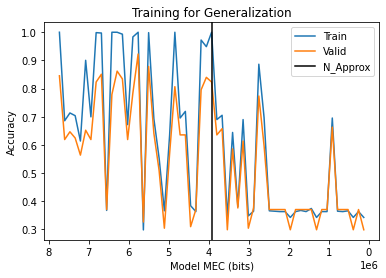

In [13]:
graph, plot = plt.subplots()
plt.plot(list(range(input_size,input_size*60, input_size)), train_accuracy_list, label="Train")
plt.plot(list(range(input_size,input_size*60, input_size)), val_accuracy_list, label="Valid")
plt.axvline(x=30*input_size, color='black', label="N_Approx")
plt.legend()
plot.invert_xaxis()
plt.xlabel("Model MEC (bits)")
plt.ylabel("Accuracy")
plt.title("Training for Generalization")

In [14]:
print(train_accuracy_list[30],val_accuracy_list[30])

0.9487534626038782 0.8397790055248618


In [15]:
clf_30 = MLPClassifier(hidden_layer_sizes=(30,), random_state=42, max_iter=1000, activation='relu')
clf_30.fit(X,y)
num_correct = (clf_30.predict(X) == y).sum()
acc = num_correct  / len(y)
print("The training accuracy after choosing the hidden layer size is", acc)
print("The generalization after choosing the hidden layer size is", num_correct / (input_size*19))

The training accuracy after choosing the hidden layer size is 1.0
The generalization after choosing the hidden layer size is 0.0003625914810677456


In [16]:
test_data = pd.read_csv("combined_test_features.csv")
X_test = test_data.iloc[:,1:-1]
y_test = test_data.iloc[:,-1]

num_correct = (clf_30.predict(X_test) == y_test).sum()
acc = num_correct / len(y_test)
print("The test accuracy after choosing the hidden layer size is " + str(acc))

The test accuracy after choosing the hidden layer size is 0.5752212389380531


In [17]:
print(classification_report(y_test, clf_30.predict(X_test), target_names=['Dry', 'Normal', 'Wet']))
accuracy_score(y_test, clf_30.predict(X_test), normalize=False)
confusion_matrix(y_test, clf_30.predict(X_test))

              precision    recall  f1-score   support

         Dry       0.86      0.43      0.57        42
      Normal       0.46      0.72      0.56        39
         Wet       0.65      0.62      0.63        32

    accuracy                           0.58       113
   macro avg       0.65      0.59      0.59       113
weighted avg       0.66      0.58      0.59       113



array([[18, 21,  3],
       [ 3, 28,  8],
       [ 0, 12, 20]])